In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv("newhouseprice.csv")
dataset = df.select_dtypes(include=['number'])

dataset.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0


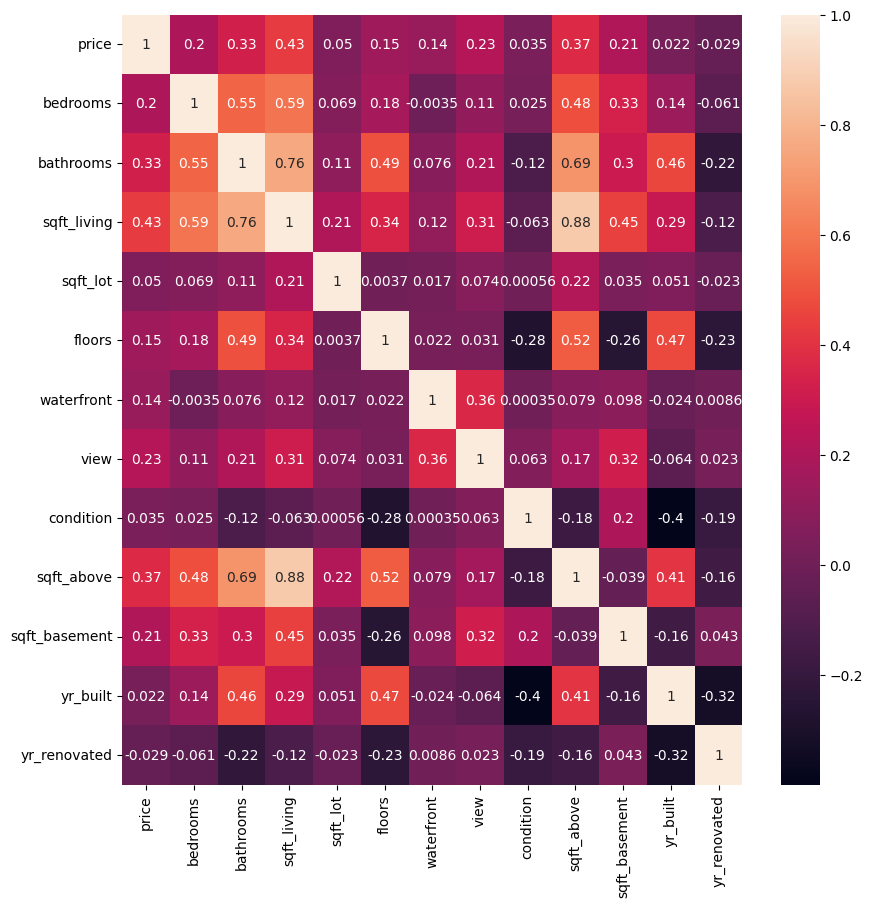

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [37]:
x = dataset.iloc[:,:-1]
y = dataset["price"]

In [38]:
se = StandardScaler()
se.fit(x)
x =  pd.DataFrame(se.transform(x), columns=x.columns)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=32)

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

<h1>LinearRegression</h1>

In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

100.0

In [57]:
mean_squared_error(y_test, lr.predict(x_test))
mean_absolute_error(y_test, lr.predict(x_test))

3.117431491694373e-10

In [34]:
lr.coef_

array([ 5.63773413e+05, -1.61802621e-10, -5.52100983e-11, -2.19039551e-11,
       -8.89325165e-11, -3.16214069e-11, -4.39521800e-11, -1.97241480e-10,
        3.97385798e-11, -2.07988828e-11, -1.45304842e-10, -1.07172514e-11])

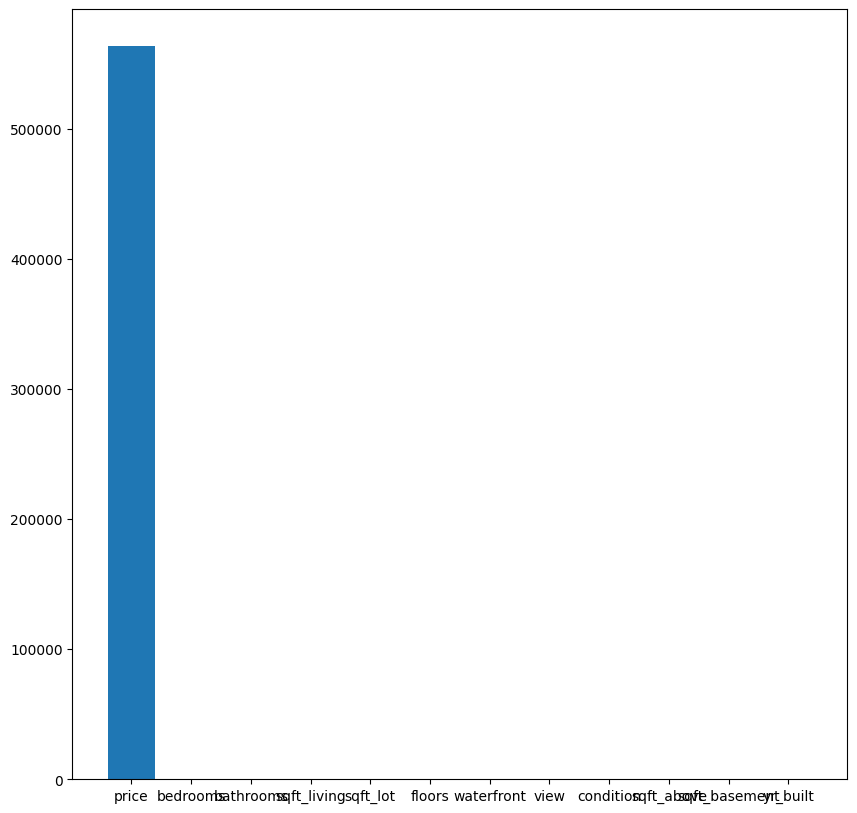

In [45]:
plt.figure(figsize=(10,10))
plt.bar(x.columns, lr.coef_)
plt.show()

<h1>Lasso</h1>

In [50]:
la = Lasso(alpha=0.01)
la.fit(x_train, y_train)
la.score(x_test, y_test)

0.9999999999999998

In [58]:
mean_squared_error(y_test, la.predict(x_test))
mean_absolute_error(y_test, la.predict(x_test))

0.003162118812321316

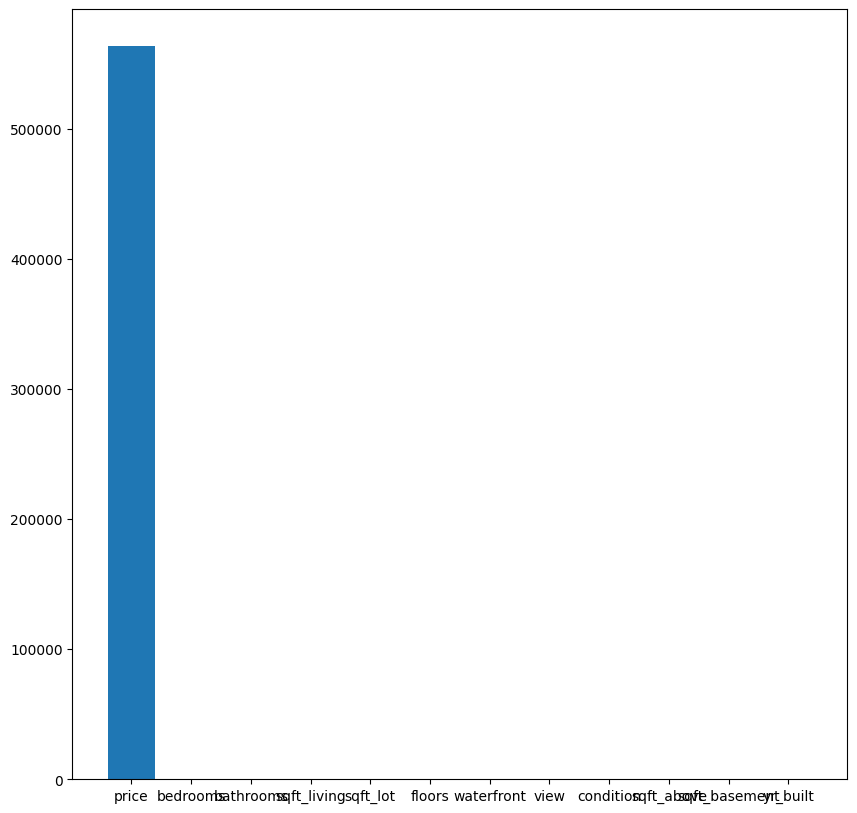

In [51]:
plt.figure(figsize=(10,10))
plt.bar(x.columns, la.coef_)
plt.show()

<h1>Ridge</h1>

In [53]:
ri = Ridge(alpha=10)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)

0.9999950675530225

In [59]:
mean_squared_error(y_test, ri.predict(x_test))
mean_absolute_error(y_test, ri.predict(x_test))

508.0180837153937

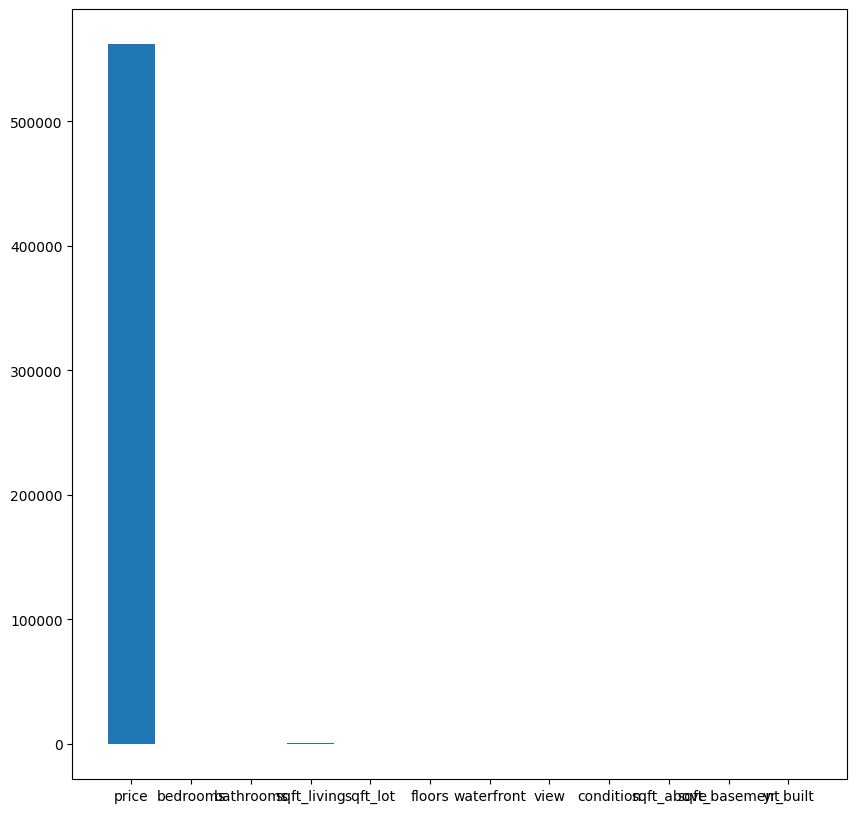

In [54]:
plt.figure(figsize=(10,10))
plt.bar(x.columns, ri.coef_)
plt.show()

In [61]:
new_df = pd.DataFrame({"col_name":x.columns, "LinearRegression": lr.coef_, "Lasso":la.coef_,"Ridge":ri.coef_})
new_df

,col_name,LinearRegression,Lasso,Ridge
0,price,5.637734e+05,563773.40541,562000.709246
1,bedrooms,-1.618026e-10,0.00000,-130.115572
2,bathrooms,-5.521010e-11,0.00000,163.134844
3,sqft_living,-2.190396e-11,0.00000,335.314591
4,sqft_lot,-8.893252e-11,0.00000,-85.193389
5,floors,-3.162141e-11,0.00000,72.424103
6,waterfront,-4.395218e-11,0.00000,82.452658
7,view,-1.972415e-10,0.00000,129.510020
8,condition,3.973858e-11,0.00000,93.205455
9,sqft_above,-2.079888e-11,0.00000,311.970004
